In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\bz115\Desktop\pythonProject1\new_pandas\EDA_customer_churn_data\Customer_ Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


STEP:1)DATA INSPECTION

A)EXPLORING THE WHOLE DATAFRAME

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")#filling spaces zero in TotalCharges column

In [11]:
df['TotalCharges']=df['TotalCharges'].astype(float)# coverting this column from string(object)to float  using astype() 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


B)CHECKING WHETHER THERE ARE NULL VALUES IN THE DATASET OR NOT BU USING ISNULL()AND SUM() FUNCTIONS

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

C)PERFORMING DESCRIPTIVE ANALYSIS By USING DESCRIBE()FUNCTION

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


D)CHECKING DUPlICATES IN THE DATAFARME USING DUPLICATED() FUNCTION

In [18]:
df.duplicated().sum()#checking on the basis of rows

np.int64(0)

In [20]:
df['customerID'].duplicated().sum()#checking on the basis of a unique column

np.int64(0)

E)CHANGING THE VALUES OF SENIOR CITIZEN COLUMN FROM[0,1] TO [YES,NO] BY USING USER DEFINED"CONVERT_VALUES" FUNCTION AND APPLYNG
THAT FUNCTION TO THE VERY COLUMN BY USING APPLY() FUNCTION

In [23]:
def convert_values(x):
    if x==0:
        return 'no'
    else:
        return 'yes'
df['SeniorCitizen']=df['SeniorCitizen'].apply(convert_values)

STEP:2)PERFORMING ANALYSIS & VISUALISATION

A)HOW MANY CUSTOMERS HAVE CHURNED AND HOW MANY HAVEN'T BY USING COUNT PLOT

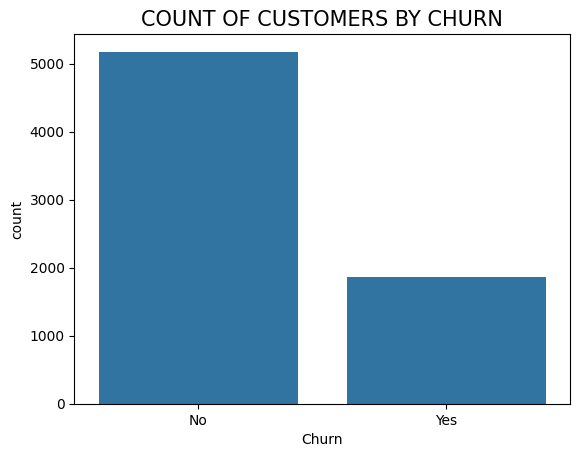

In [31]:
sns.countplot(x='Churn',data=df)
plt.title("COUNT OF CUSTOMERS BY CHURN",fontsize=15)
plt.show()

In [ ]:
B)HOW MANY MALE CUSTOMERS AND FEMALE CUSTOMERS ARE ASSOCIATED WITH THE COMPANY

In [34]:
df.groupby('gender').agg({"gender":"count"})

,gender
gender,
Female,3488
Male,3555


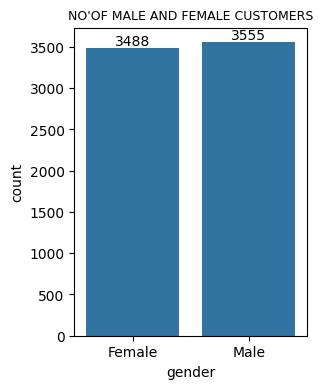

In [60]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='gender',data=df)
ax.bar_label(ax.containers[0])

plt.title("NO'OF MALE AND FEMALE CUSTOMERS",fontsize=9)
plt.show()

C)COUNT OF SENIOR CTIZENS ASSOCIATED WITH THE COMPANY

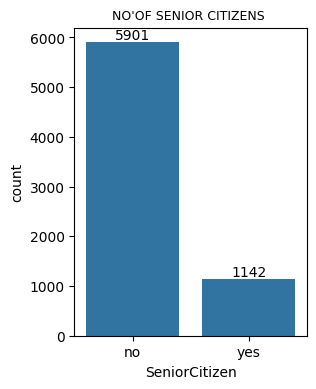

In [62]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='SeniorCitizen',data=df) #we used ax to get the values as label
ax.bar_label(ax.containers[0])

plt.title("NO'OF SENIOR CITIZENS ",fontsize=9)
plt.show()

D)TENURE AND NUMBER OF CHURNS BASED ON TENURE

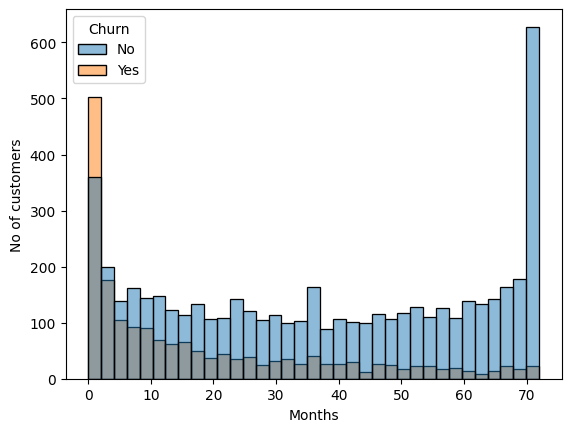

In [73]:
sns.histplot(x='tenure',data=df,bins=35,hue='Churn')
plt.xlabel("Months")
plt.ylabel("No of customers")
plt.show()
#here we can see that majority of customers have left in the initial days or months(between 0-5 months) from the company
#so we can say that people who have used the services for a longer period have stayed and people who have used it for a short time have left

E)ANALYSING CONTRACT COLUMN TO GET SOME INSIGHTS

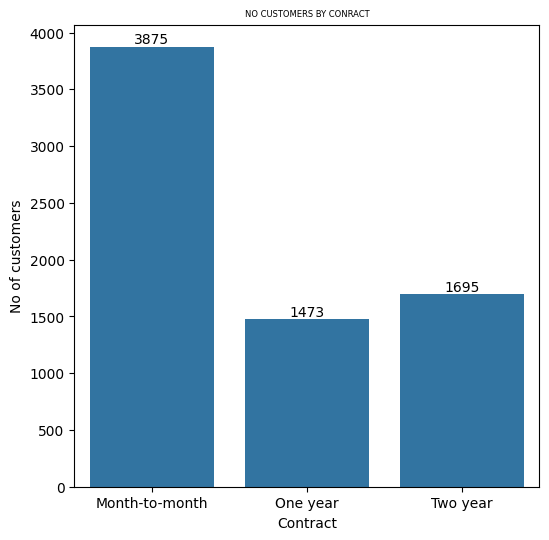

In [82]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='Contract',data=df)
ax.bar_label(ax.containers[0])
plt.ylabel("No of customers")

plt.title("NO CUSTOMERS BY CONRACT",fontsize=6)
plt.show()
#here we are able see that majority of the customers are on "MONTH TO MONTH" contract with the company followed by TWO year & ONE year contract


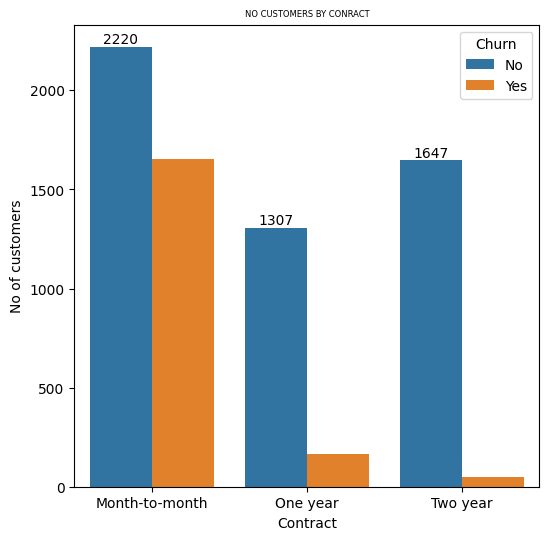

In [83]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='Contract',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.ylabel("No of customers")

plt.title("NO CUSTOMERS BY CONRACT",fontsize=6)
plt.show()
#here we are able see that majority of the customers are on "MONTH TO MONTH" contract with the company followed by TWO year & ONE year contract
#and most of the customers who have left  were on MONTH TO MONTH contract.

F)ANALYSING SERVICES

1:)

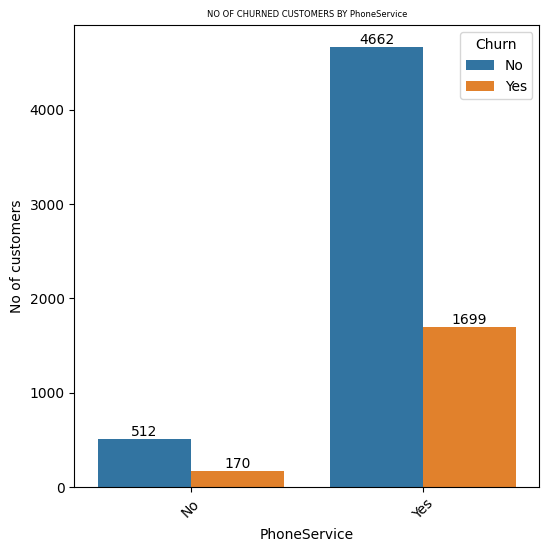

In [108]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='PhoneService',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY PhoneService",fontsize=6)
plt.show()


2:)

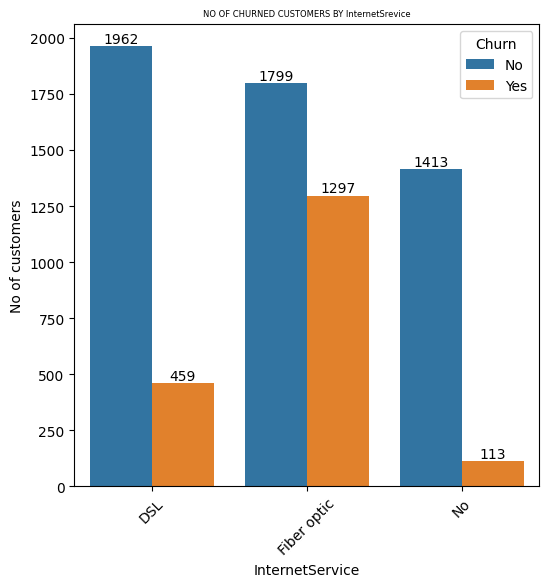

In [105]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='InternetService',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY InternetSrevice",fontsize=6)
plt.show()
#here we can observe that people having fiber optics as an internet service are tend to churn more

3:)

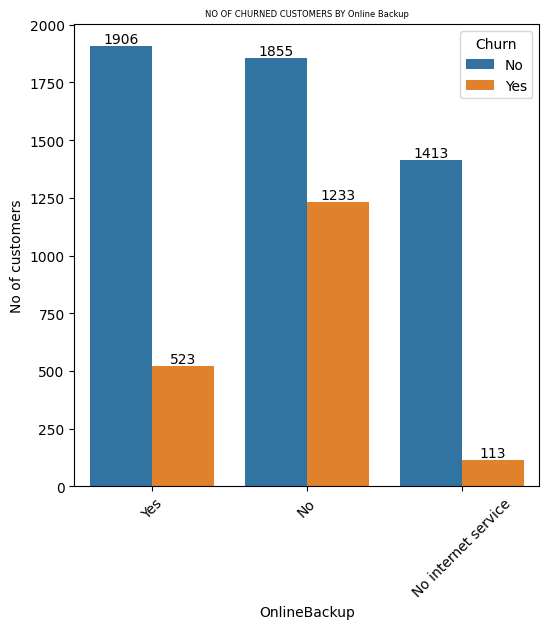

In [103]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='OnlineBackup',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY Online Backup",fontsize=6)
plt.show()

4:)

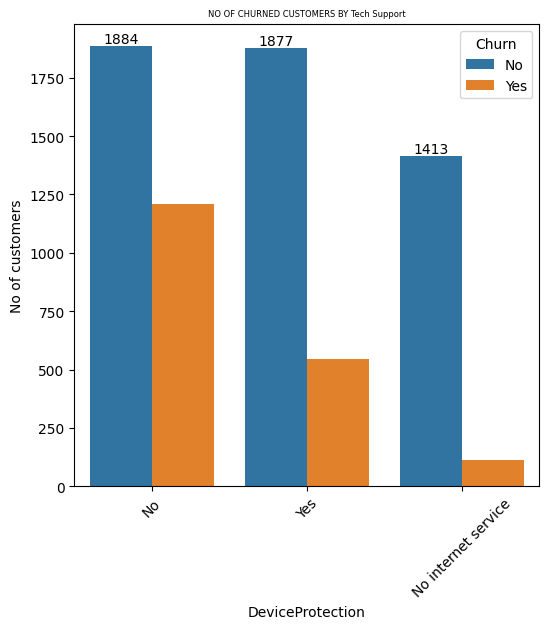

In [100]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='DeviceProtection',data=df,hue='Churn')
ax.bar_label(ax.containers[0])

plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY Tech Support",fontsize=6)
plt.show()


5:)

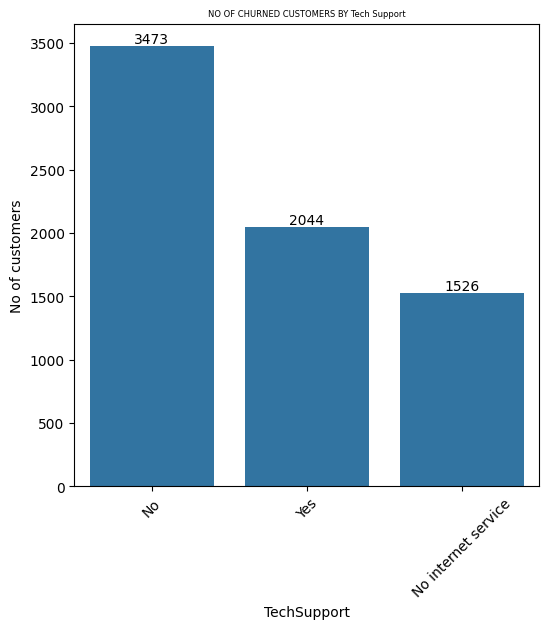

In [94]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='TechSupport',data=df)
ax.bar_label(ax.containers[0])

plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY Tech Support",fontsize=6)
plt.show()


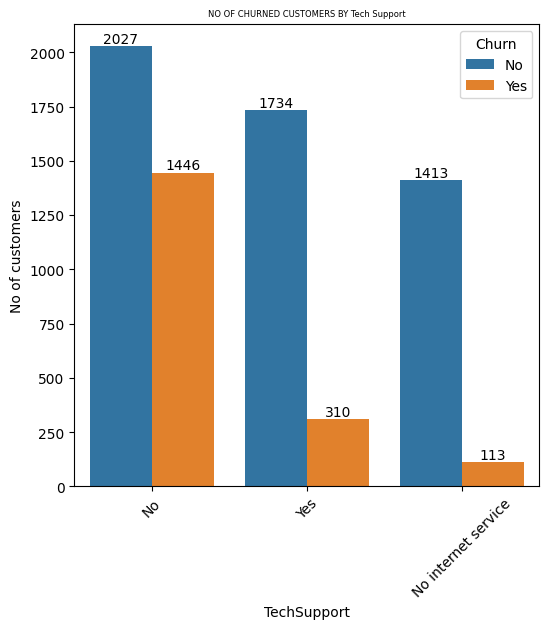

In [96]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='TechSupport',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY Tech Support",fontsize=6)
plt.show()
#here we can see that the customers having no "Tech support" as a service are tend to chrun more

6:)

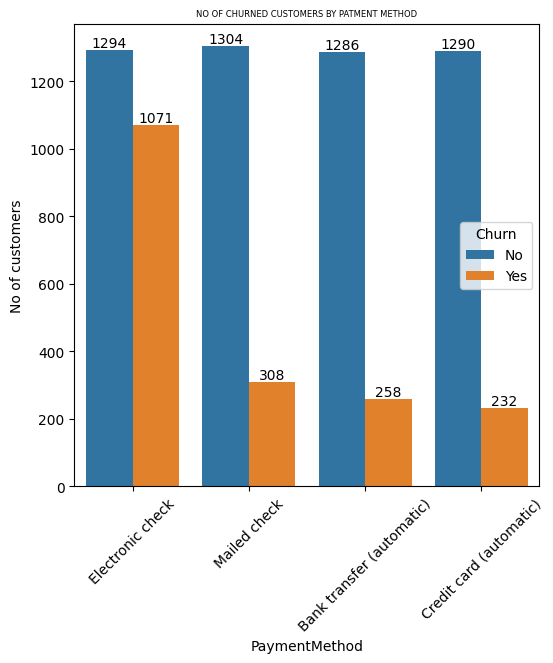

In [90]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='PaymentMethod',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.ylabel("No of customers")
plt.xticks(rotation=45)

plt.title("NO OF CHURNED CUSTOMERS BY PATMENT METHOD",fontsize=6)
plt.show()
#here we can see that the customers with electronic check as a payment method have churned a lot more than others
#where as customers credit card(automatic)as a payment method havn't churned that much